# Fig 10: *Drosophila* species with higher levels of neutral polymorphism and higher recombination rate accumulate postzygotic RI more slowly

In [1]:
from io import StringIO
import numpy as np
import pandas as pd
from Bio import Phylo
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

In [2]:
%load_ext rpy2.ipython

In [15]:
%%R
library(caper)

R[write to console]: Loading required package: ape

R[write to console]: Loading required package: MASS

R[write to console]: Loading required package: mvtnorm



## Import data

* **RIv** rates with which postzygotic RI accumulates with genetic distance in
  each *Drosophila* species group (from Rabosky & Matute 2013).
* **pi_s** average levels of neutral polymorphism measured by the synonymous
  nucleotide diversity $(\pi_s)$ at the *Adh* locus (see S1 Table). 
* **n** number of *Drosophila* species per species group for which there is an
  estimate of $\pi_s$.
* **rec** average total map length in cM (see S2 Table).
* **n2** number of *Drosophila* species per species group for which there is an
  estimate of total map length.

In [4]:
data = pd.read_csv('raw_data/Fig10.csv', index_col='group')
data

,RIv,pi_s,n,rec,n2
group,,,,,
montium,-1.258555,0.032502,8,282.3,1
virilis,-0.692966,0.024731,5,682.5,2
immigrans,-0.539924,0.026005,4,752.6,2
repleta,-0.460076,0.020081,5,675.9,2
obscura,-0.054183,0.012397,5,723.3,3
willistoni,0.784221,0.013376,4,320.4,1
ananassae,1.163498,0.015822,1,350.1,1
melanogaster,1.196768,0.012881,6,401.9,3


In [5]:
%%R -i data
head(data)

                   RIv       pi_s n   rec n2
montium    -1.25855513 0.03250192 8 282.3  1
virilis    -0.69296578 0.02473130 5 682.5  2
immigrans  -0.53992395 0.02600459 4 752.6  2
repleta    -0.46007605 0.02008120 5 675.9  2
obscura    -0.05418251 0.01239716 5 723.3  3
willistoni  0.78422053 0.01337647 4 320.4  1


## Linear OLS regression of RI velocity against $\pi_s$

In [6]:
%%R -o pars
model = lm(RIv ~ pi_s, data=data)
pars = coef(model)
summary(model)


Call:
lm(formula = RIv ~ pi_s, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8428 -0.2474  0.0839  0.1926  0.7353 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.0937     0.5703   3.671  0.01044 * 
pi_s        -105.2677    27.2776  -3.859  0.00837 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5345 on 6 degrees of freedom
Multiple R-squared:  0.7128,	Adjusted R-squared:  0.665 
F-statistic: 14.89 on 1 and 6 DF,  p-value: 0.008371



In [14]:
pars

array([   2.09368803, -105.26773585])

In [7]:
%%R -o resid
resid = model$resid
data$RIv_resid = resid
data

                     RIv       pi_s n   rec n2   RIv_resid
montium      -1.25855513 0.03250192 8 282.3  1  0.06916068
virilis      -0.69296578 0.02473130 5 682.5  2 -0.18324565
immigrans    -0.53992395 0.02600459 4 752.6  2  0.10383232
repleta      -0.46007605 0.02008120 5 675.9  2 -0.43986141
obscura      -0.05418251 0.01239716 5 723.3  3 -0.84284958
willistoni    0.78422053 0.01337647 4 320.4  1  0.09864352
ananassae     1.16349810 0.01582183 1 350.1  1  0.73533829
melanogaster  1.19676806 0.01288051 6 401.9  3  0.45898183


In [8]:
data['RIv_resid'] = resid
data

,RIv,pi_s,n,rec,n2,RIv_resid
group,,,,,,
montium,-1.258555,0.032502,8,282.3,1,0.069161
virilis,-0.692966,0.024731,5,682.5,2,-0.183246
immigrans,-0.539924,0.026005,4,752.6,2,0.103832
repleta,-0.460076,0.020081,5,675.9,2,-0.439861
obscura,-0.054183,0.012397,5,723.3,3,-0.842850
willistoni,0.784221,0.013376,4,320.4,1,0.098644
ananassae,1.163498,0.015822,1,350.1,1,0.735338
melanogaster,1.196768,0.012881,6,401.9,3,0.458982


## Adding total map length to linear OLS regression model

In [13]:
%%R
model2 = lm(RIv ~ pi_s + rec, data=data)
summary(model2)


Call:
lm(formula = RIv ~ pi_s + rec, data = data)

Residuals:
     montium      virilis    immigrans      repleta      obscura   willistoni 
    -0.35102      0.06271      0.46046     -0.19397     -0.50260     -0.21611 
   ananassae melanogaster 
     0.46312      0.27741 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.897e+00  6.225e-01   4.654  0.00556 **
pi_s        -1.030e+02  2.248e+01  -4.581  0.00594 **
rec         -1.620e-03  8.248e-04  -1.964  0.10671   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4399 on 5 degrees of freedom
Multiple R-squared:  0.8379,	Adjusted R-squared:  0.7731 
F-statistic: 12.92 on 2 and 5 DF,  p-value: 0.01058



## PGLS regression analysis assuming Brownian motion of RI velocity against $\pi_s$

In [21]:
%%R
data <- cbind(group = rownames(data), data)
rownames(data) <- 1:nrow(data)
data

         group         RIv       pi_s n   rec n2   RIv_resid
1      montium -1.25855513 0.03250192 8 282.3  1  0.06916068
2      virilis -0.69296578 0.02473130 5 682.5  2 -0.18324565
3    immigrans -0.53992395 0.02600459 4 752.6  2  0.10383232
4      repleta -0.46007605 0.02008120 5 675.9  2 -0.43986141
5      obscura -0.05418251 0.01239716 5 723.3  3 -0.84284958
6   willistoni  0.78422053 0.01337647 4 320.4  1  0.09864352
7    ananassae  1.16349810 0.01582183 1 350.1  1  0.73533829
8 melanogaster  1.19676806 0.01288051 6 401.9  3  0.45898183


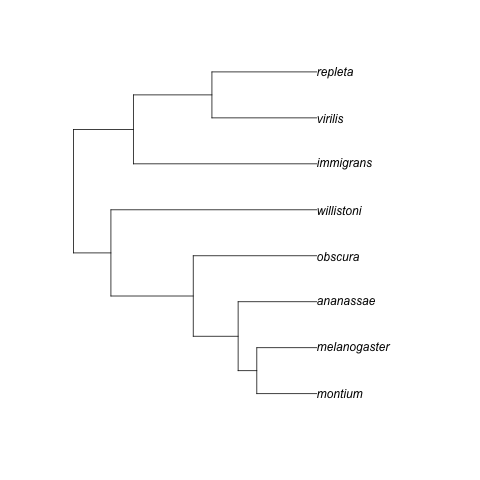

In [18]:
%%R
tree <- read.tree(text="(((((montium:1.6,melanogaster:1.6):0.5,ananassae:2.1):1.2, obscura:3.3):2.2, willistoni:5.5):1.0, (immigrans:4.9, (virilis:2.8, repleta:2.8):2.1):1.6);")
plot(tree)

In [22]:
%%R
compdata = comparative.data(phy = tree, data = data, names.col = group, vcv = TRUE, na.omit = FALSE, warn.dropped = TRUE)
compdata

Comparative dataset of 8 taxa:
Phylogeny: tree 
   8 tips, 7 internal nodes
   chr [1:8] "montium" "melanogaster" "ananassae" "obscura" "willistoni" ...
VCV matrix present:
   'VCV.array' num [1:8, 1:8] 6.5 4.9 4.4 3.2 1 0 0 0 4.9 6.5 ...
Data: data 
   $ RIv      : num [1:8] -1.2586 1.1968 1.1635 -0.0542 0.7842 ...
   $ pi_s     : num [1:8] 0.0325 0.0129 0.0158 0.0124 0.0134 ...
   $ n        : int [1:8] 8 6 1 5 4 4 5 5
   $ rec      : num [1:8] 282 402 350 723 320 ...
   $ n2       : int [1:8] 1 3 1 3 1 2 2 2
   $ RIv_resid: num [1:8] 0.0692 0.459 0.7353 -0.8428 0.0986 ...


In [24]:
%%R
model.BM <- pgls(RIv ~ pi_s, data=compdata)
summary(model.BM)


Call:
pgls(formula = RIv ~ pi_s, data = compdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57782 -0.18477 -0.10270  0.03319  0.10347 

Branch length transformations:

kappa  [Fix]  : 1.000
lambda [Fix]  : 1.000
delta  [Fix]  : 1.000

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    2.19651    0.55049  3.9901 0.007200 **
pi_s        -113.48263   21.55228 -5.2655 0.001891 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2745 on 6 degrees of freedom
Multiple R-squared: 0.8221,	Adjusted R-squared: 0.7924 
F-statistic: 27.73 on 1 and 6 DF,  p-value: 0.001891 


## Fig 10

**Note:** For some reason the plot does not look right in the notebook but
the output should be correct.

In [9]:
spp = data.index.tolist()
spp

['montium',
 'virilis',
 'immigrans',
 'repleta',
 'obscura',
 'willistoni',
 'ananassae',
 'melanogaster']

In [10]:
for i in ['axes.labelsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[i] = 26
for i in ['axes.linewidth', 'xtick.major.width', 'ytick.major.width']:
    plt.rcParams[i] = 3.5
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

<Figure size 640x480 with 0 Axes>

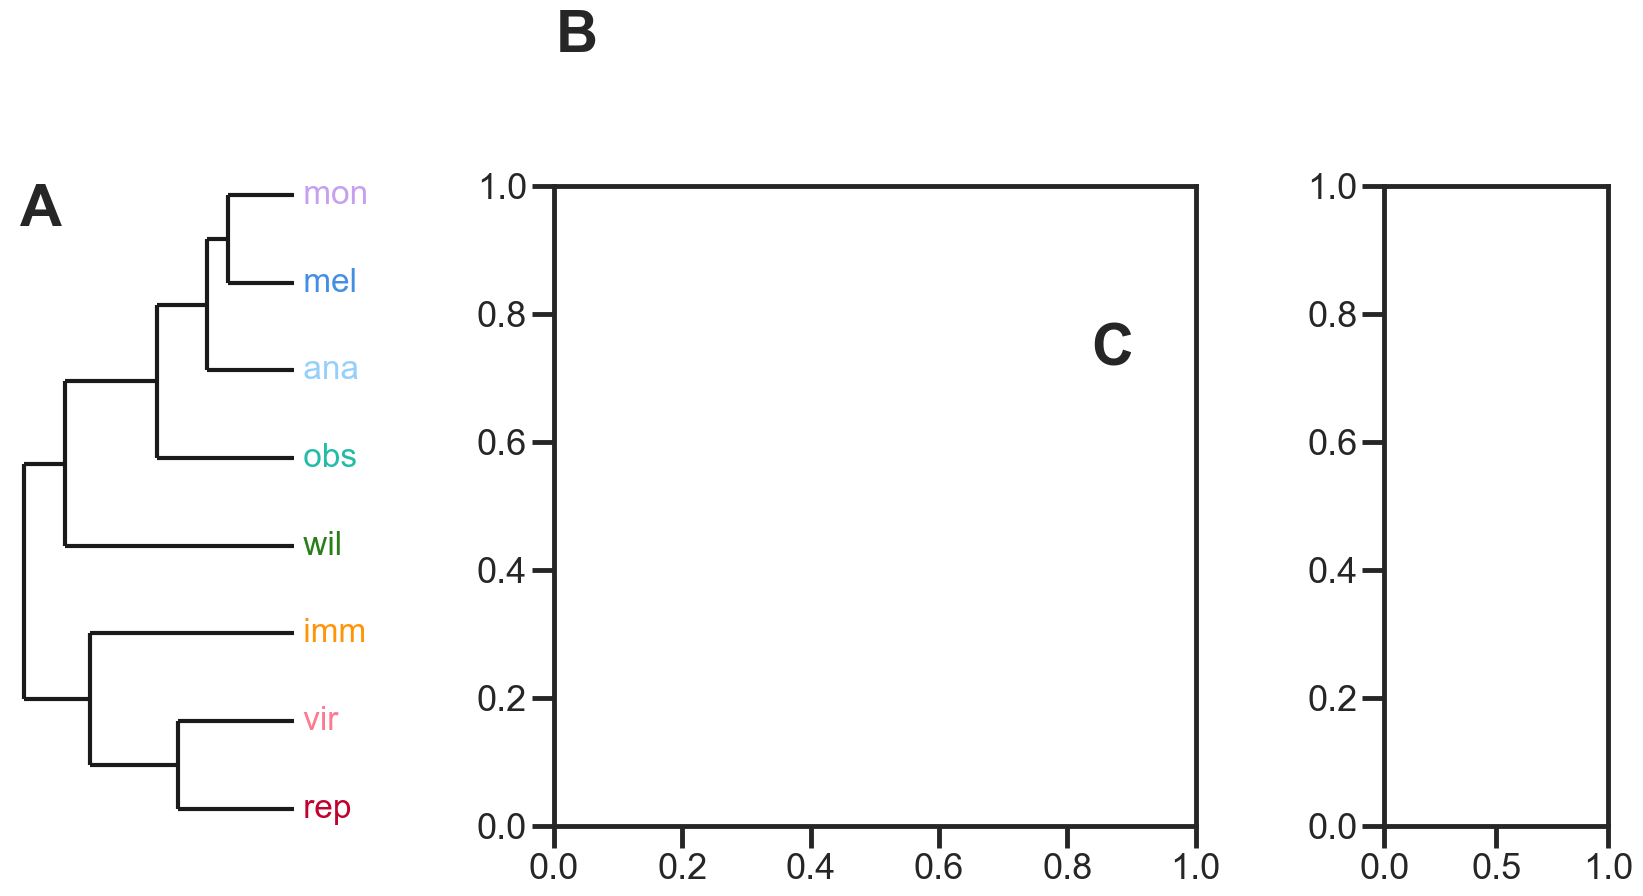

In [12]:
## axes
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 8))
ax1.set_position([-.002, .064, .22, .942])
ax1.axis('off')
ax2.set_position([.338, .13, .401, .8])
ax3.set_position([.857, .13, .14, .8])
### labels
ax1.text(-.08, 1.35, 'A', weight='bold', size=42)
ax2.text(0.0035, 1.21, 'B', weight='bold', size=42)
ax3.text(-1.31, .72, 'C', weight='bold', size=42)
### colors
cols = ["lavender", "carnation", "tangerine", "lipstick red", "tealish", "tree green", "light blue", "dark sky blue"]
### A tree
tree = Phylo.read(StringIO("(((((mon:1.6,mel:1.6):0.5,ana:2.1):1.2, obs:3.3):2.2, wil:5.5):1.0, (imm:4.9, (vir:2.8, rep:2.8):2.1):1.6);"), "newick")
Phylo.draw(tree, axes=ax1, label_colors={spp[i][:3]: sns.xkcd_rgb[cols[i]] for i in range(8)}, )
### B RIv against pi_s
# OLS regression
x = np.linspace(.008, .034, 10)
y = pars[0] + pars[1] * x
ax2.plot(x, y, color="k", lw=4)
# points
pts = np.sqrt(data['rec']) * .8
for i in range(8):
    ax2.plot(data.loc[spp[i], 'pi_s'], data.loc[spp[i], 'RIv'], 'o', color=sns.xkcd_rgb[cols[i]], ms=pts[i])
    ax3.plot(data.loc[spp[i], 'rec'] > 500, data.loc[spp[i], 'RIv_resid'], 'o', color=sns.xkcd_rgb[cols[i]], clip_on=False, ms=pts[i])
# labels on the left
for i in [0, 1, 7]:
    ax2.text(data.loc[spp[i], 'pi_s']-.0008 * pts[i] / 20, data.loc[spp[i], 'RIv'], spp[i][:3], ha='right', va='center', size=24, color=sns.xkcd_rgb[cols[i]])   
# labels on the right
for i in [2, 3, 4, 5, 6]:
    ax2.text(data.loc[spp[i], 'pi_s']+.0008 * pts[i] / 20, data.loc[spp[i], 'RIv'], spp[i][:3], ha='left', va='center', size=24, color=sns.xkcd_rgb[cols[i]])
ax2.text(.0299, 1.2, 'Map length', color="0.7", ha='center', va='center')
for a in [300, 500, 700]:
    h = a / 1000 + .28
    ax2.plot(.0285, h, 'o', color="0.7", ms=np.sqrt(a)*.8)
    ax2.text(.03, h, a, ha='left', va='center', color="0.7")
ax2.set_xlim(.009, .034)
ax2.set_xticks(np.arange(.01, .031, .01))
ax2.set_xlabel('Nucleotide diversity')
ax2.set_ylim(-1.42, 1.385)
ax2.set_yticks(np.arange(-1, 1.1, .5))
ax2.set_ylabel('Postzygotic RI velocity')
### C RIvresiduals by map length
ax3.set_xlabel('Map length')
ax3.set_xlim(-.3, 1.3)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Short', 'Long'])
ax3.set_ylabel('Residual postzygotic RI velocity')
ax3.set_ylim(-.95, .83)
ax3.set_yticks(np.arange(-.8, .81, .4))
ax3.plot([0, 1], [data.loc[data['rec'] < 500, 'RIv_resid'].mean(), data.loc[data['rec'] > 500, 'RIv_resid'].mean()], color="k", lw=4)
fig.savefig('Fig10.pdf');